# Order statistics

This notebook introduces order statistics numerically.

# Setup

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 

plt.rcParams.update({"text.usetex": True, 'font.size':14, 'font.family':'serif'})

np.random.seed(1337)

In [2]:
R = 1000000

# Theory: Order statistics

Let $(X_1,...,X_N)$ be a sample of $N$ draws. The notation $(X_{(1)}, ..., X_{(N)})$ denotes the *sorted* vector of the $N$ draws. That is, $X_{(1)}$ is the minimum, $X_{(n)}$ is the maximums, and $X_{(k)}$ is the $k$'th smallest, which we call the $k$'th order statistic. 

In auction theory, it becomes useful to think of the distribution of the $k$'th order statistic. Just like the sample average, $ \bar{X} \equiv N^{-1} \sum_{i=1}^N X_i$, the $k$'th order statistic is just a function of our $n$ stochastic variables. Since any function of a stochastic variable is itself a stochastic variable, the $k$'th order statistic has a distribution, which will have a mean, a std.dev., etc. 

## Normally distributed variables with $N=5$

In [3]:
N = 5 # number of samples each time (e.g. number of bidders in our auction)
u = np.random.normal(0,1,(N,R))
U = pd.DataFrame(u)

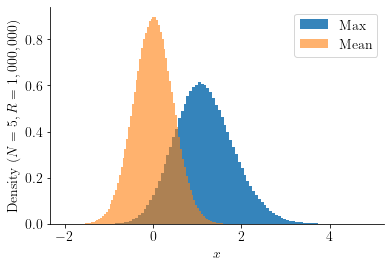

In [4]:
fig, ax = plt.subplots()
U.max(0).hist(bins=100,  ax=ax, label='Max', alpha=0.9, density=True); 
U.mean(0).hist(bins=100, ax=ax, label='Mean',alpha=0.6, density=True); 
ax.legend(loc='best'); 
sns.despine(); ax.grid(False); 
ax.set_xlabel('$x$'); ax.set_ylabel(f'Density ($N={N}, R={R:,}$)'); 
plt.savefig('img/normal_maxmean.pdf'); 

Plotting the unsorted data

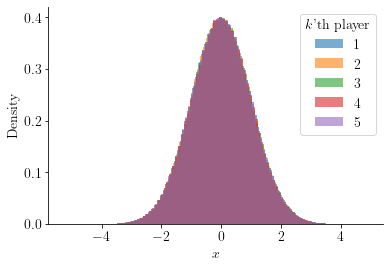

In [5]:
fig, ax = plt.subplots()
for k in range(u.shape[0]): 
    ax.hist(u[k, :], density=True, alpha=0.6, label=f'${k+1}$', bins=100); 
ax.legend(loc='best', title="$k$'th player"); sns.despine(); 
ax.grid(False); ax.set_xlabel('$x$'); ax.set_ylabel('Density'); 
plt.savefig('img/normal_hist_unsorted.pdf'); 

Now let's instead sort the dataset

In [6]:
u_sort = np.sort(u, 0)

... and show what it looks like separately for each *order* position ($k$). 

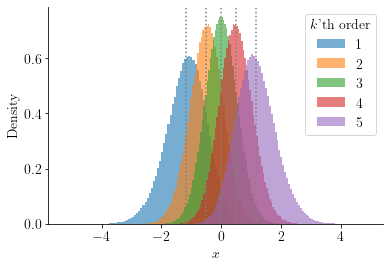

In [7]:
u_sort = np.sort(u, 0)
fig, ax = plt.subplots()
for k in range(u_sort.shape[0]): 
    ax.hist(u_sort[k, :], density=True, alpha=0.6, label=f'${k+1}$', bins=100); 
ax.legend(loc='best', title="$k$'th order"); sns.despine(); 
ax.set_xlabel('$x$'); ax.set_ylabel('Density'); 
for k in range(u_sort.shape[0]): 
    ax.axvline(u_sort[k, :].mean(), color='gray', linestyle=':'); 
plt.savefig('img/normal_hist_sorted_meanlines.pdf'); 

## Varying $N$ 

Next, we can consider what the *average* of the $k$'th order statistic looks like depending on the sample size, $N$, for $k = n-1,n$ (i.e. the largest and 2nd largest values). 

In [8]:
NN = np.array([2,3,4,5,6])
kk = np.array([-1, -2])
k_labs = ['N', 'N-1']
yy = np.empty((len(kk), len(NN)))
for iN,N in enumerate(NN): 
    u = np.random.normal(0,1,(N,R))
    u = np.sort(u, 0)
    for ik,k in enumerate(kk): 
        yy[ik, iN] = u[k, :].mean()
    

And let's plot this. 

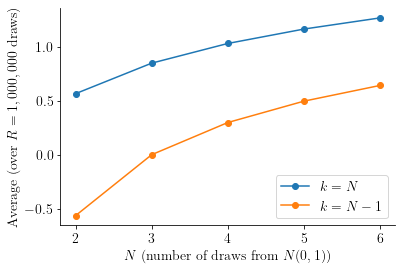

In [9]:
fig, ax = plt.subplots(); 
for ik, k in enumerate(kk): 
    ax.plot(NN, yy[ik, :], '-o', label=f'$k={k_labs[ik]}$'); 
ax.legend(loc='best'); ax.set_xlabel('$N$ (number of draws from $N(0,1)$)'); 
ax.set_ylabel(f'Average (over $R={R:,}$ draws)'); sns.despine(); 
plt.savefig('img/normal_largest_and_2nd_largest.pdf')

# Uniform distribution

Next, we do it all again, but this time for the uniform distribution

In [10]:
# take R draws of independent values 
N = 5
u = np.random.uniform(0,1,(N,R))

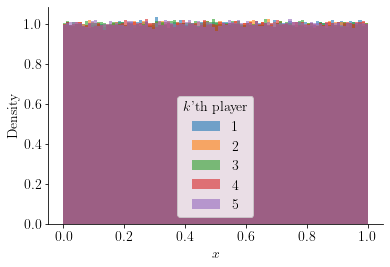

In [11]:
fig, ax = plt.subplots()
for k in range(u.shape[0]): 
    ax.hist(u[k, :], density=True, alpha=0.6, label=f'${k+1}$', bins=100); 
ax.legend(loc='lower center', title="$k$'th player"); sns.despine(); 
ax.grid(False); ax.set_xlabel('$x$'); ax.set_ylabel('Density'); 
plt.savefig('img/uniform_hist_unsorted.pdf'); 

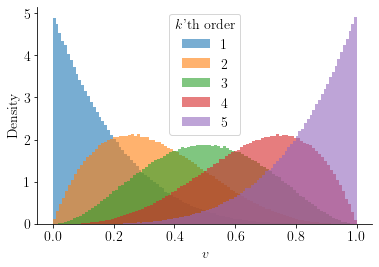

In [12]:
u_sort = np.sort(u, 0)

fig, ax = plt.subplots()
for r in range(u_sort.shape[0]): 
    ax.hist(u_sort[r, :], density=True, alpha=0.6, label=f'${r+1}$', bins=100); 
ax.legend(loc='best', title="$k$'th order"); sns.despine(); 
ax.set_xlabel('$v$'); ax.set_ylabel('Density'); 

## Varying $N$ 

In [13]:
NN = np.array([2,3,4,5,6])
kk = np.array([-1, -2])
k_labs = ['N', 'N-1']
yy = np.empty((len(kk), len(NN)))
for iN,N in enumerate(NN): 
    u = np.random.uniform(0,1,(N,R))
    u = np.sort(u, 0)
    for ik,k in enumerate(kk): 
        yy[ik, iN] = u[k, :].mean()
    

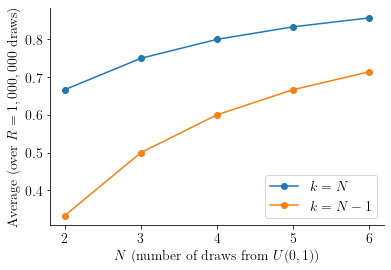

In [14]:
fig, ax = plt.subplots(); 
for ik, k in enumerate(kk): 
    ax.plot(NN, yy[ik, :], '-o', label=f'$k={k_labs[ik]}$'); 
ax.legend(loc='best'); ax.set_xlabel('$N$ (number of draws from $U(0,1)$)'); 
ax.set_ylabel(f'Average (over $R={R:,}$ draws)'); sns.despine(); 
plt.savefig('img/uniform_largest_and_2nd_largest.pdf')

## Verifying with analytic formulas

We know that if $X_i \sim U(0,1)$, then $X_{(k)} \sim \mathcal{B}(k, n+1-k)$. That is, when $X_i$ are uniformly distributed, the order statistics are beta distributed. This implies that the expected values are simply: 

$$ \mathbb{E}\left( X_{(k)} ) \right) = \frac{k}{n+1}, \quad k = 1, ..., n. $$ 

(and just to be clear, our notation is that $X_{(1)}$ is the minimum and $X_{(n)}$ is the maximum.) 

**First:** We comapre the expected value formula to the average of a large number of simulations. 

In [15]:
N=6
u = np.random.uniform(0,1,(N,R))
u = np.sort(u, 0)

for k in range(1,N+1): 
    # compute 
    mean_analytic  = k/(N+1)
    mean_simulated = u[k-1,:].mean() # "k-1" to get from base 1 to base 0 
    
    # print 
    print(f'--- k={k} ---')
    print(f'{"Simulated":<15} = {mean_simulated: 10.5f}') 
    print(f'{"Formula":<15} = {mean_analytic: 10.5f}')

--- k=1 ---
Simulated       =    0.14308
Formula         =    0.14286
--- k=2 ---
Simulated       =    0.28576
Formula         =    0.28571
--- k=3 ---
Simulated       =    0.42851
Formula         =    0.42857
--- k=4 ---
Simulated       =    0.57137
Formula         =    0.57143
--- k=5 ---
Simulated       =    0.71429
Formula         =    0.71429
--- k=6 ---
Simulated       =    0.85703
Formula         =    0.85714


**Second:** we compare the ***actual distributions***. It turns out, that if $X_i \sim \mathcal{U}(0,1)$ and we draw $N$ samples, then 
$$X_{(k)} \sim \mathcal{B}(k,N+1-k).$$ 
That is, the order statistics from the uniform distribution are beta distributed! 

In [16]:
k = N-1 # pick which order statistic to look at 

In [17]:
b = np.random.beta(k,N+1-k,(R,))

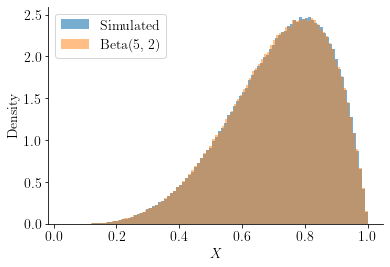

In [18]:
fig, ax = plt.subplots(); 
ax.hist(u[k-1, :], label='Simulated',           density=True, alpha=0.6, bins=100); 
ax.hist(b,      label=f'Beta({k}, {N+1-k})', density=True, alpha=0.5, bins=100); 
ax.legend(loc='best'); sns.despine(); ax.set_xlabel('$X$'); ax.set_ylabel('Density'); 
plt.savefig('img/beta_vs_simulation.pdf'); 

# Truncated distributions

In [19]:
u = np.random.normal(0,1,(R,))
v = np.random.normal(0,1,(R,))

trunc = 1.0 
v = v[v <= trunc] # deleting truncated rows 

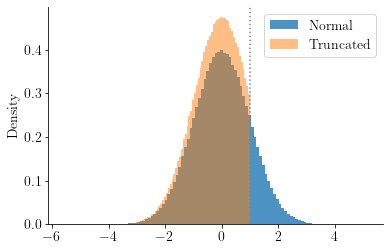

In [20]:
fig, ax = plt.subplots(); 
ax.hist(u, density=True, alpha=0.8, bins=100, label='Normal')
ax.hist(v, density=True, alpha=0.5, bins=100, label='Truncated')
ax.legend(loc='best'); ax.set_ylabel('Density'); ax.axvline(trunc, color='gray', linestyle=':'); 
sns.despine(); 
plt.savefig('img/truncated.pdf');